In [15]:
import numpy as np
from hw1_utils import load_images, load_labels
import matplotlib.pyplot as plt
%matplotlib inline  

train_X = load_images()
train_y = load_labels()

a) see the code below

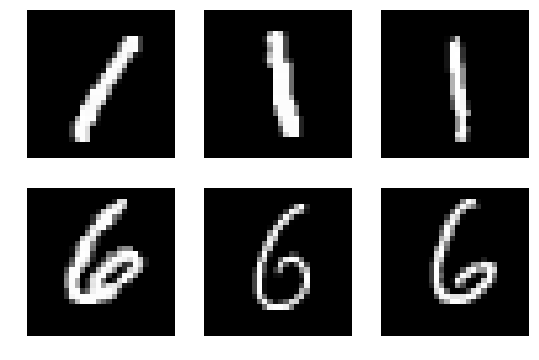

In [5]:
# we take out all the Xs that corresponded to a 1 or 6
X = train_X[(train_y==1)|(train_y==6),]
# we set 1 to be class 1 and 6 to be class 0
y = train_y[(train_y==1)|(train_y==6)]==1

n = 0;
cnt = np.zeros((2,1))
fig = plt.figure(figsize=(9,6))
# plot three of each sample digit
while sum(cnt)<6:
    if y[n] and cnt[0]<3:
        cnt[0]+=1
        plt.subplot(2,3,cnt[0])
        plt.imshow(np.reshape(X[n,:],[28,28]))
        plt.set_cmap('gray')
        plt.axis('off')
    elif ~y[n] and cnt[1]<3:
        cnt[1]+=1
        plt.subplot(2,3,3+cnt[1])
        plt.imshow(np.reshape(X[n,:],[28,28]))
        plt.set_cmap('gray')
        plt.axis('off')
    n+=1

b) A hyperplane over the pixel space allows us to create halfsapces containing images of the two difference classes, which effectively allows for the classification of the digits

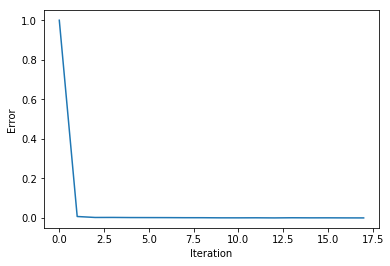

12660


In [8]:
nx = np.size(X,1)+1
ny = np.size(X,0)
X0 = np.hstack((X,-np.ones((ny,1))))
X0[~y,] = -X0[~y,]
w = np.zeros((nx))
y_est = np.squeeze(np.matmul(X0,w))>0
lpcnt = 0
err = sum(~y_est)/ny
while sum(y_est)<ny:
    lpcnt+=1
    i = 0
    while i<ny:
        y_est[i] = np.matmul(X0[i,],w)>0
        if y_est[i]<=0:
            w+=X0[i,]/np.linalg.norm(X0[i,])
        i+=1
    err = np.append(err,sum(~y_est)/ny)

# plot the error over each pass through the dataset
plt.plot(err)
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()
print(ny)

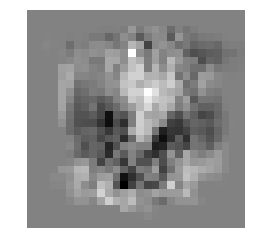

In [7]:
# we visualize the weight learned
plt.imshow(np.reshape(w[0:784],[28,28]))
plt.axis('off')
plt.colorbar
plt.show()

c) The digits are indeed linearly seperable. Which is somewhat surprising given the simplicity of the decision rule. It is more surprising given we know based on Cover's Theorem that the capacity of the perceptron $\alpha = P/N = 2$, with $P$ being the number of patterns in general position and $N$ being the number of dimensions. In the MNIST 1-6 classification toy problem we have $N = 785$ and $\\P = 12660$, $\alpha \approx 16$ ! Which is much larger than two. We measure empirically the dimensionality of the class samples to see how far do we deviate from the general position assumption.

In [37]:
# number 1
Xc = X[y==1,:]
Xc = Xc-Xc.mean(axis=0)[np.newaxis,:]
XCOV = np.matmul(Xc.T,Xc)
eigvals, eigvecs = np.linalg.eig(XCOV)
np.real(np.power(np.sum(eigvals),2)/np.sum(np.power(eigvals,2)))

6.375594778205746

In [38]:
# number 6
Xc = X[y==0,:]
Xc = Xc-Xc.mean(axis=0)[np.newaxis,:]
XCOV = np.matmul(Xc.T,Xc)
eigvals, eigvecs = np.linalg.eig(XCOV)
np.real(np.power(np.sum(eigvals),2)/np.sum(np.power(eigvals,2)))

17.310722837334108

We see that as expected, number 1 has a lower dimension as number 6. Also we observe that the images are highly correlated. Suggesting that in this case, the classical perceptron capacity is a conservative measure.